In [1]:
pwd

'/Users/amit'

In [444]:
from nltk.corpus import twitter_samples
from nltk.tokenize import TweetTokenizer

In [445]:

tknzr = TweetTokenizer()
positive_tweets = twitter_samples.strings('positive_tweets.json')

#positive_tweet_tokens = tknzr.tokenize(positive_tweets)

negative_tweets = twitter_samples.strings('negative_tweets.json')
#negative_tweet_tokens = tknzr.tokenize('positive_tweets.json')
text = twitter_samples.strings('tweets.20150430-223406.json')

In [446]:
def Tokenize_Tweet(list_of_tweets):
    tknzr = TweetTokenizer()
    p = []
    for l in list_of_tweets:
        p.append(tknzr.tokenize(l))
        
    return p   

positive_tweets
#p = tknzr.tokenize(positive_tweets[1])


r = Tokenize_Tweet(positive_tweets)

words = [df['Tweet'] for sent in df['Tweet']]

In [447]:
df['Tweet'] = df['Tweet'].apply(tknzr.tokenize)
    

In [448]:
df['Tweet']

2186    [glad, hear, solve, luke, :), name, store, pas...
5427                     [mommy's, manila, i've, see, :(]
350     [#teenchoice, #choiceinternationalartist, #sup...
5355    [pffff, private, #bugbounty, find, self-xss, h...
7209          [say, hello, viners, palembang, please, :(]
                              ...                        
2018    [love, problem, :), #ngarepfollbackdarinabilah...
6426            [try, sadly, code, attach, try, sign, :(]
6515      [sadly, show, masaan, :(, watch, muv, come, hd]
4735                                  [fab, giveaway, :)]
138     [plan, watch, late, 34, min, leia, appear, hol...
Name: Tweet, Length: 10000, dtype: object

In [449]:
df = pd.DataFrame(data = positive_tweets,columns = ['Tweet'])
df['Sentiment'] = 1
df2 = pd.DataFrame(data = negative_tweets,columns = ['Tweet'])
df2['Sentiment'] = -1
df = df.append(df2, ignore_index=True)
df

,Tweet,Sentiment
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,1
1,@Lamb2ja Hey James! How odd :/ Please call our...,1
2,@DespiteOfficial we had a listen last night :)...,1
3,@97sides CONGRATS :),1
4,yeaaaah yippppy!!! my accnt verified rqst has...,1
...,...,...
9995,I wanna change my avi but uSanele :(,-1
9996,MY PUPPY BROKE HER FOOT :(,-1
9997,where's all the jaebum baby pictures :((,-1
9998,But but Mr Ahmad Maslan cooks too :( https://t...,-1


In [450]:
df['Tweet'][5]


'@BhaktisBanter @PallaviRuhail This one is irresistible :)\n#FlipkartFashionFriday http://t.co/EbZ0L2VENM'

In [451]:
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /Users/amit/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/amit/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [455]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tag import pos_tag
def lemmatize_sentence(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(tokens):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sentence

print(lemmatize_sentence(tweet_tokens[1]))
print(lemmatize_sentence(df['Tweet']))

['@Lamb2ja', 'Hey', 'James', '!', 'How', 'odd', ':/', 'Please', 'call', 'our', 'Contact', 'Centre', 'on', '02392441234', 'and', 'we', 'will', 'be', 'able', 'to', 'assist', 'you', ':)', 'Many', 'thanks', '!']


AttributeError: 'list' object has no attribute 'isdigit'

In [453]:
df['Tweet'] = df['Tweet'].apply(lemmatize_sentence)


In [454]:
df['Tweet']

0       [#, F, o, l, l, o, w, F, r, i, d, a, y,  , @, ...
1       [@, L, a, m, b, 2, j, a,  , H, e, y,  , J, a, ...
2       [@, D, e, s, p, i, t, e, O, f, f, i, c, i, a, ...
3       [@, 9, 7, s, i, d, e, s,  , C, O, N, G, R, A, ...
4       [y, e, a, a, a, a, h,  , y, i, p, p, p, p, y, ...
                              ...                        
9995    [I,  , w, a, n, n, a,  , c, h, a, n, g, e,  , ...
9996    [M, Y,  , P, U, P, P, Y,  , B, R, O, K, E,  , ...
9997    [w, h, e, r, e, ', s,  , a, l, l,  , t, h, e, ...
9998    [B, u, t,  , b, u, t,  , M, r,  , A, h, m, a, ...
9999    [@, e, a, w, o, m, a, n,  , A, s,  , a,  , H, ...
Name: Tweet, Length: 10000, dtype: object

In [303]:
def remove_noise(tweet_tokens): #, stop_words = ()):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/amit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [306]:
import re, string
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(tweet_tokens[0])
print(remove_noise(tweet_tokens[0]))

['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)']
['#followfriday', 'top', 'engage', 'member', 'community', 'week', ':)']


In [308]:

#print(remove_noise(df['Tweet'][0], stop_words))
df['Tweet'] = df['Tweet'].apply(remove_noise)

In [315]:
print((df['Tweet'][0]))
#print(remove_noise(df['Tweet'][0], stop_words))

['#followfriday', 'top', 'engage', 'member', 'community', 'week', ':)']


In [316]:
df['Tweet']

0       [#followfriday, top, engage, member, community...
1       [hey, jam, odd, :/, please, call, contact, cen...
2       [listen, last, night, :), bleed, amazing, trac...
3                                          [congrats, :)]
4       [yeaaaah, yippppy, accnt, verify, rqst, succee...
                              ...                        
9995                    [wanna, change, avi, usanele, :(]
9996                             [puppy, break, foot, :(]
9997                 [where's, jaebum, baby, picture, :(]
9998                        [mr, ahmad, maslan, cook, :(]
9999     [hull, supporter, expect, misserable, week, :-(]
Name: Tweet, Length: 10000, dtype: object

In [318]:
#Shuffle the dataframe
df = df.sample(frac=1)
df

# If you want to reset the index while random shuffling
#df = df.sample(frac=1).reset_index(drop=True)

,Tweet,Sentiment
2186,"[glad, hear, solve, luke, :), name, store, pas...",1
5427,"[mommy's, manila, i've, see, :(]",-1
350,"[#teenchoice, #choiceinternationalartist, #sup...",1
5355,"[pffff, private, #bugbounty, find, self-xss, h...",-1
7209,"[say, hello, viners, palembang, please, :(]",-1
...,...,...
2018,"[love, problem, :), #ngarepfollbackdarinabilah...",1
6426,"[try, sadly, code, attach, try, sign, :(]",-1
6515,"[sadly, show, masaan, :(, watch, muv, come, hd]",-1
4735,"[fab, giveaway, :)]",1


In [336]:
df['Tweet'].head()
tokenized_tweet = df['Tweet']
tokenized_tweet.head()
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [354]:
tokenized_tweet.head()
df['Tweet'] = tokenized_tweet
df

,Tweet,Sentiment
2186,glad hear solve luke :) name store pass kind w...,1
5427,mommy's manila i've see :(,-1
350,#teenchoice #choiceinternationalartist #superj...,1
5355,pffff private #bugbounty find self-xss host he...,-1
7209,say hello viners palembang please :(,-1
...,...,...
2018,love problem :) #ngarepfollbackdarinabilahjkt48,1
6426,try sadly code attach try sign :(,-1
6515,sadly show masaan :( watch muv come hd,-1
4735,fab giveaway :),1


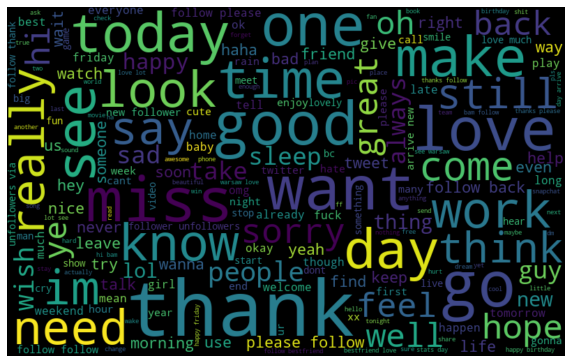

In [405]:
import matplotlib.pyplot as plt 
import seaborn as sns

all_words = ' '.join([text for text in df['Tweet'][df['Sentiment'] == 1]])
all_words = ' '.join([text for text in df['Tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [411]:
len(all_words)
from nltk import FreqDist
g = ['amanda']
freq_dis = FreqDist(corpus)
#print(freq_dist_pos.most_common(100))
freq_dis.most_common(2500)


[('follow follow u back :)', 62),
 ('follow thanks please follow :(', 51),
 (':(', 40),
 ('stats day arrive 1 new follower unfollowers :) via', 31),
 ('thank :)', 28),
 ('fback :)', 25),
 (':)', 24),
 ('thanks :)', 24),
 ('hello :) get youth job opportunity follow', 19),
 ('miss :(', 18),
 ("hi would like concert let know city country i'll start work thank :)", 17),
 ('welcome :)', 13),
 ('stats week arrive 1 new follower unfollowers :) via', 13),
 ('sorry :(', 12),
 ('visit blog thanks :d', 12),
 ("i'm play brain dot #braindots", 11),
 ('happy friday :-)', 11),
 ('stats day arrive 2 new follower unfollowers :) via', 8),
 ('cute :(', 8),
 ('follow :(', 8),
 ('sure :)', 7),
 (':-(', 7),
 ('happy birthday :)', 6),
 ('#followfriday top engage member community week :)', 6),
 (':-)', 6),
 ('love :)', 6),
 ('#followfriday top influencers community week :)', 6),
 ('follow :)', 6),
 ('thank :d', 6),
 ('morning :)', 6),
 ('baby :(', 5),
 ('thank :-)', 5),
 (':d', 5),
 ('okay :)', 5),
 ('thanks 

In [413]:
generate(all_words[0])

NameError: name 'generate' is not defined

In [107]:
# Build up a list of all tokens from all the tweets
# From positive token list => 5000 tweets * number of tokens per tweet
# From negative token list => 5000 tweets * number of tokens per tweet
# Not yet cleaned

%timeit
positive_tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
negative_tweet_tokens = twitter_samples.tokenized('negative_tweets.json')

positive_cleaned_tokens_list = []
negative_cleaned_tokens_list = []



# Now clean tokens
# 1 list for positive cleaned tokens (removed stopwords and added a part of speech tag to each token)
# 1 list for negative cleaned tokens (removed stopwords and added a part of speech tag to each token)

for tokens in positive_tweet_tokens:
    positive_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

for tokens in negative_tweet_tokens:
    negative_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

 

In [180]:
import pandas as pd
df = pd.DataFrame(data= positive_cleaned_tokens_list)
positive_cleaned_tokens_list


df

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,#followfriday,top,engage,member,community,week,:),None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,hey,james,odd,:/,please,call,contact,centre,02392441234,able,...,None,None,None,None,None,None,None,None,None,None
2,listen,last,night,:),bleed,amazing,track,scotland,None,None,...,None,None,None,None,None,None,None,None,None,None
3,congrats,:),None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,yeaaaah,yippppy,accnt,verify,rqst,succeed,get,blue,tick,mark,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,chris,that's,great,hear,:),due,time,reminder,indeed,plan,...,None,None,None,None,None,None,None,None,None,None
4996,thanks,shout-out,:),great,aboard,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4997,hey,:),long,time,talk,...,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4998,matt,would,say,welcome,adulthood,...,:),None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [63]:
print(positive_tweet_tokens[500])
print(positive_cleaned_tokens_list[500])

['Dang', 'that', 'is', 'some', 'rad', '@AbzuGame', '#fanart', '!', ':D', 'https://t.co/bI8k8tb9ht']
['dang', 'rad', '#fanart', ':d']


In [325]:
corpus = []
t1 = "This is the first document "
t2 = "This is the second second document "
t3 = "This is the third document "
t4 = "This is the 4th doc "
corpus.append(t1)
corpus.append(t2)
corpus.append(t3)
corpus.append(t4)


In [152]:
corpus = [
   'This is the first document.',     'This is the second second document.',
     'And the third one.',
 'Is this the first document?',
 ]

In [362]:
corpus = df['Tweet']
#corpus = tokenized_tweet

In [429]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.7, min_df=2, max_features=100, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(corpus)
bow_vectorizer.get_feature_names()
print(bow_vectorizer.vocabulary_)

{'coffe': 22, 'daredevil': 30, 'emoticon': 37, 'clap': 21, 'philippa': 73, 'matchy': 65, 'tab': 90, 'lotsa': 62, 'smthng': 84, 'apmas': 4, 'apexis': 3, 'crystal': 26, 'tt': 93, 'buffer': 15, '05': 0, 'wagga': 95, 'hamster': 44, 'iran': 53, 'wsj': 97, 'intro': 51, 'ov': 69, 'wt': 98, 'pixgram': 74, 'inuyasha': 52, 'karain': 57, 'chek': 19, 'haix': 43, 'backflip': 9, 'maple': 64, 'animated': 2, 'tony': 92, 'bias': 13, 'scheme': 80, 'braid': 14, 'commits': 24, 'deth': 31, 'yogurt': 99, 'material': 66, 'wiper': 96, 'slovenia': 83, 'mapbox': 63, 'qualify': 76, 'timming': 91, 'repath': 78, 'dewsbury': 32, 'sellyourcarin5words': 81, 'chaloniklo': 18, 'expo': 39, 'caramello': 17, '99': 1, 'stealth': 88, 'approval': 5, 'patrice': 72, 'dom': 34, 'kareena': 58, 'junjou': 55, 'hayeee': 46, 'sweetbj': 89, 'cynical': 28, 'mister': 67, 'irish': 54, 'gun': 42, 'cornetto': 25, 'tunisia': 94, 'dum': 36, 'razi': 77, 'bbmme': 11, 'bbm': 10, 'bbmpin': 12, 'extravagant': 40, 'reputation': 79, 'hee': 47, 'na

In [431]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(corpus)

In [430]:
corpus

2186    glad hear solve luke :) name store pass kind w...
5427                           mommy's manila i've see :(
350     #teenchoice #choiceinternationalartist #superj...
5355    pffff private #bugbounty find self-xss host he...
7209                 say hello viners palembang please :(
                              ...                        
2018      love problem :) #ngarepfollbackdarinabilahjkt48
6426                    try sadly code attach try sign :(
6515               sadly show masaan :( watch muv come hd
4735                                      fab giveaway :)
138     plan watch late 34 min leia appear hologram r2...
Name: Tweet, Length: 10000, dtype: object

In [418]:
# Bag of Words 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:7000,:]
test_bow = bow[7000:,:]

In [425]:
# splitting data into training and validation set
# Term Freq (Bag of Words)
X_train, X_test, y_train, y_test = train_test_split(bow, df['Sentiment'], random_state=42, test_size=0.3)


In [433]:
#Using tf-idf
X_train, X_test, y_train, y_test = train_test_split(text_tf, df['Sentiment'], random_state=42, test_size=0.3)



In [434]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)

In [435]:
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.7423333333333333


In [436]:
lreg = LogisticRegression()
lreg.fit(X_train, y_train) # training the model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [443]:
prediction = lreg.predict_proba(X_test) # predicting on the validation set
#cf_matrix = confusion_matrix(y_test, y_pred)
prediction_sentiment = prediction[:,1] >= 0.5 
prediction

array([[0.19604448, 0.80395552],
       [0.79363794, 0.20636206],
       [0.39231254, 0.60768746],
       ...,
       [0.61311905, 0.38688095],
       [0.81044183, 0.18955817],
       [0.77718065, 0.22281935]])

In [442]:
prediction_sentiment = -1 if prediction_sentiment== False else 1
f1_score(y_test, prediction_prediction_sentiment)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [417]:
v = bow_vectorizer.vocabulary_


type(v)
def get_count(vocab):
    return vovab.get('Name')
import operator

sorted_v = sorted(v.items(), key=operator.itemgetter(1))
sorted_v

[('001', 0),
 ('05', 1),
 ('99', 2),
 ('animated', 3),
 ('apexis', 4),
 ('apmas', 5),
 ('approval', 6),
 ('archdbanterbury', 7),
 ('athabasca', 8),
 ('atp', 9),
 ('backflip', 10),
 ('bbm', 11),
 ('bbmme', 12),
 ('bbmpin', 13),
 ('bias', 14),
 ('braid', 15),
 ('buffer', 16),
 ('canvas', 17),
 ('caramello', 18),
 ('chaloniklo', 19),
 ('chek', 20),
 ('cilic', 21),
 ('clap', 22),
 ('coffe', 23),
 ('collat', 24),
 ('commits', 25),
 ('cornetto', 26),
 ('crystal', 27),
 ('cycling', 28),
 ('cynical', 29),
 ('daal', 30),
 ('daredevil', 31),
 ('deth', 32),
 ('dewsbury', 33),
 ('dhan', 34),
 ('dom', 35),
 ('doo', 36),
 ('doodle', 37),
 ('dum', 38),
 ('emoticon', 39),
 ('explanation', 40),
 ('expo', 41),
 ('extravagant', 42),
 ('glacier', 43),
 ('gun', 44),
 ('haix', 45),
 ('hamster', 46),
 ('har', 47),
 ('hayeee', 48),
 ('hee', 49),
 ('idr', 50),
 ('ign', 51),
 ('intellectual', 52),
 ('intro', 53),
 ('inuyasha', 54),
 ('iran', 55),
 ('irish', 56),
 ('junjou', 57),
 ('karachi', 58),
 ('karain', 59

In [349]:
bow_vectorizer.get_feature_names()
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
number = vectorizer.get_feature_names()
print(len(number))

10594


In [341]:
bigram_vectorizer = CountVectorizer(ngram_range=(1, 2),
...                                     token_pattern=r'\b\w+\b', min_df=1)
X_2 = bigram_vectorizer.fit_transform(corpus).toarray()
X_2
feature_index = bigram_vectorizer.vocabulary_.get('is this')
X_2[:, feature_index]

array([[[0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0]]])

In [78]:
# Generator for all cleaned token lists

def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

all_pos_words = get_all_words(positive_cleaned_tokens_list)
all_neg_words = get_all_words(negative_cleaned_tokens_list)

all_neg_words = get_all_words(negative_cleaned_tokens_list)

In [79]:
# All positive tokens
# See how frequently they occur (in positive tweets)
from nltk import FreqDist

freq_dist_pos = FreqDist(all_pos_words)
print(freq_dist_pos.most_common(25))

# All negative tokens
# See how frequently they occur (in negative tweets)

freq_dist_neg = FreqDist(all_neg_words)
print(freq_dist_neg.most_common(25))

[(':)', 3691), (':-)', 701), (':d', 658), ('thanks', 388), ('follow', 357), ('love', 333), ('...', 290), ('good', 283), ('get', 263), ('thank', 253), ('u', 245), ('day', 242), ('like', 229), ('see', 195), ('happy', 192), ("i'm", 183), ('great', 175), ('hi', 173), ('go', 167), ('back', 163), ('know', 161), ('new', 147), ('make', 145), (':p', 139), ('<3', 135)]
[(':(', 4585), (':-(', 501), ("i'm", 343), ('...', 332), ('get', 325), ('miss', 291), ('go', 275), ('please', 275), ('want', 246), ('like', 218), ('♛', 210), ('》', 210), ('u', 193), ("can't", 180), ('time', 160), ('follow', 156), ('sorry', 149), ('one', 149), ('see', 145), ('day', 144), ('love', 141), ('much', 139), ('know', 137), ('good', 135), ('really', 133)]


In [104]:
# positive_cleaned_tokens_list => 5000 cleaned tweets + POS * number of tokens per tweet
# negative_cleaned_tokens_list => 5000 cleaned tweets + POS * number of tokens per tweet

def get_tweets_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)

positive_tokens_for_model = get_tweets_for_model(positive_cleaned_tokens_list)
negative_tokens_for_model = get_tweets_for_model(negative_cleaned_tokens_list)

In [81]:
# Create a list of all cleaned tokenised tweets
# List contains Token:True, Tag (sentiment = Negative/Positive)
...
import random

positive_dataset = [(tweet_dict, "Positive")
                     for tweet_dict in positive_tokens_for_model]

negative_dataset = [(tweet_dict, "Negative")
                     for tweet_dict in negative_tokens_for_model]

dataset = positive_dataset + negative_dataset

random.shuffle(dataset)

# Splitting the dataset of tweets (train/test) => 70/30 which is why train = all tweets upto 7000, 
# and test = all tweets from 7000 onwards

train_data = dataset[:5000]
test_data = dataset[5000:]

In [85]:
from pandas import DataFrame 
df = DataFrame (train_data[][0],columns=['Tweet'])

In [95]:
train_data_tweet = [i[0] for i in train_data]
train_data_tweet_sentiment = [i[1] for i in train_data]

In [97]:
train_data_tweet[0]
train_data_tweet_sentiment[1]


'Positive'

In [105]:
d = [i for i in positive_tokens_for_model]
d

[{'#followfriday': True,
  'top': True,
  'engage': True,
  'member': True,
  'community': True,
  'week': True,
  ':)': True},
 {'hey': True,
  'james': True,
  'odd': True,
  ':/': True,
  'please': True,
  'call': True,
  'contact': True,
  'centre': True,
  '02392441234': True,
  'able': True,
  'assist': True,
  ':)': True,
  'many': True,
  'thanks': True},
 {'listen': True,
  'last': True,
  'night': True,
  ':)': True,
  'bleed': True,
  'amazing': True,
  'track': True,
  'scotland': True},
 {'congrats': True, ':)': True},
 {'yeaaaah': True,
  'yippppy': True,
  'accnt': True,
  'verify': True,
  'rqst': True,
  'succeed': True,
  'get': True,
  'blue': True,
  'tick': True,
  'mark': True,
  'fb': True,
  'profile': True,
  ':)': True,
  '15': True,
  'day': True},
 {'one': True,
  'irresistible': True,
  ':)': True,
  '#flipkartfashionfriday': True},
 {'like': True,
  'keep': True,
  'lovely': True,
  'customer': True,
  'wait': True,
  'long': True,
  'hope': True,
  'enjoy

In [40]:
len(dataset[2]), dataset[2]

(2, ({'high': True, 'school': True, 'day': True, ':(': True}, 'Negative'))

In [46]:
dataset[2][0]


{'high': True, 'school': True, 'day': True, ':(': True}

In [47]:
dataset[2][1]

'Negative'

In [106]:

from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(d)

AttributeError: 'dict' object has no attribute 'lower'

In [50]:
import numpy as np
train_data_features = np.array(train_data)

In [51]:
train_data_features

array([[{'anytime': True, 'lil': True, 'nigga': True, '(:': True},
        'Negative'],
       [{'niall': True, 'niwll': True, ':(': True}, 'Negative'],
       [{'high': True, 'school': True, 'day': True, ':(': True},
        'Negative'],
       ...,
       [{'stats': True, 'day': True, 'arrive': True, '1': True, 'new': True, 'follower': True, 'unfollowers': True, ':)': True, 'via': True},
        'Positive'],
       [{'u': True, 'probs': True, 'fun': True, 'david': True},
        'Negative'],
       [{'spam': True, 'folder': True, 'wow': True, 'win': True, 'huge': True, 'amount': True, 'need': True, 'travel': True, 'nigeria': True, 'claim': True, ':)': True},
        'Positive']], dtype=object)

In [62]:
from nltk import word_tokenize
text = "My fish is great fghf ££££##"
tokens = word_tokenize(text)
print (pos_tag(tokens))

[('My', 'PRP$'), ('fish', 'NN'), ('is', 'VBZ'), ('great', 'JJ'), ('fghf', 'JJ'), ('££££', 'NNP'), ('#', '#'), ('#', '#')]


In [70]:
def infinite_sequence():
    num = 0
    while True:
        yield num
        num += 1

In [73]:
gen = infinite_sequence()
next(gen)

0

In [74]:
next(gen)

1